In [2]:
# Descriptive Analytics for Numerical Columns
import pandas as pd
df=pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [5]:
numerical_cols = df.select_dtypes(include=['number']).columns  # .select_dtypes(include='number') filters only numeric columns.
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [6]:
numerical_cols = df.select_dtypes(include=['number']).mean()
numerical_cols


Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [7]:
numerical_cols = df.select_dtypes(include=['number']).median()
numerical_cols

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [8]:
numerical_cols = df.select_dtypes(include=['number']).mode().iloc[0] # mode() can return multiple rows if there are multiple modes. .iloc[0] grabs the first one for simplicity.
numerical_cols

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [9]:
numerical_cols = df.select_dtypes(include=['number']).std()
numerical_cols

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [10]:
''' Interpretation of Statistics:
1 Mean: The average value of the data in the column.
2 Median: The middle value of the data when sorted, less affected by outliers than the mean.
3 Mode: The most frequently occurring value(s) in the column.
4 Standard Deviation: A measure of the dispersion or spread of the data around the mean. A higher standard deviation indicates greater variability.'''


' Interpretation of Statistics:\n1 Mean: The average value of the data in the column.\n2 Median: The middle value of the data when sorted, less affected by outliers than the mean.\n3 Mode: The most frequently occurring value(s) in the column.\n4 Standard Deviation: A measure of the dispersion or spread of the data around the mean. A higher standard deviation indicates greater variability.'

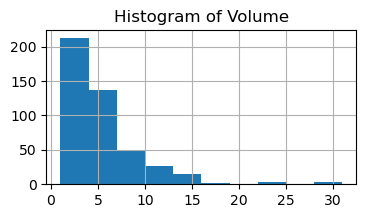

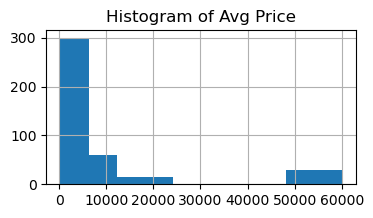

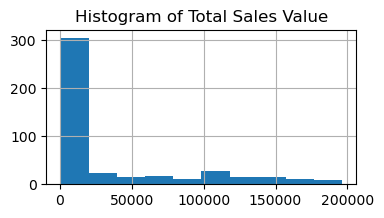

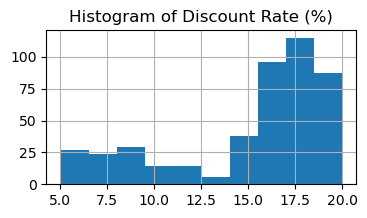

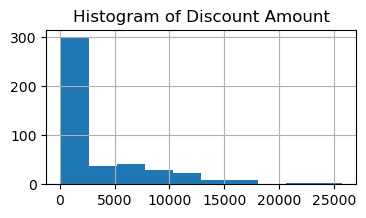

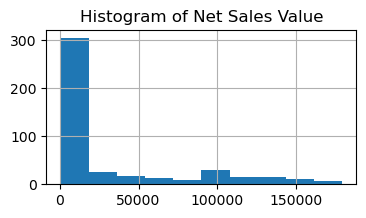

In [11]:
# #  Data Visualization
# # Plot histograms for each numerical column.

numerical_cols = df.select_dtypes(include=['number']).columns  # .select_dtypes(include='number') filters only numeric columns.

import matplotlib.pyplot as plt

# Generate histograms for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    df[col].hist()
    plt.title(f'Histogram of {col}')
    plt.show()

In [12]:
skewness = df[numerical_cols].skew()
print("Skewness\n:", skewness)

Skewness
: Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


In [13]:
# Loop through each numerical column

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    print('Lower:',lower_limit)
    print('Upper:',upper_limit)

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(col , ": " ,len(outliers) , " outlier(s) found.")


Lower: -1.5
Upper: 10.5
Volume :  44  outlier(s) found.
Lower: -13987.5
Upper: 24552.5
Avg Price :  60  outlier(s) found.
Lower: -73050.0
Upper: 128950.0
Total Sales Value :  36  outlier(s) found.
Lower: 7.740578642625298
Upper: 24.339202378829146
Discount Rate (%) :  45  outlier(s) found.
Lower: -6823.594880316146
Upper: 12600.54961088833
Discount Amount :  24  outlier(s) found.
Lower: -66266.347664084
Upper: 116316.46916099661
Net Sales Value :  35  outlier(s) found.


In [14]:
# inferences
''' After Analyzing the distribution for the numerical columns, We have found that all columns have positively skewed that means skewness is on 
    Right side but only Discount Rate (%) column is Negitively skewed that means skewness is on Left side.

                             After checking the presence of outliers, We have found outliers for all the columns . '''

' After Analyzing the distribution for the numerical columns, We have found that all columns have positively skewed that means skewness is on \n    Right side but only Discount Rate (%) column is Negitively skewed that means skewness is on Left side.\n\n                             After checking the presence of outliers, We have found outliers for all the\xa0columns\xa0.\xa0'

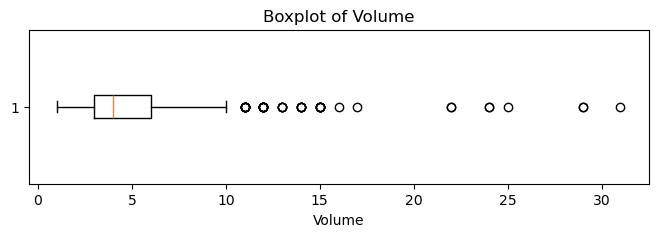

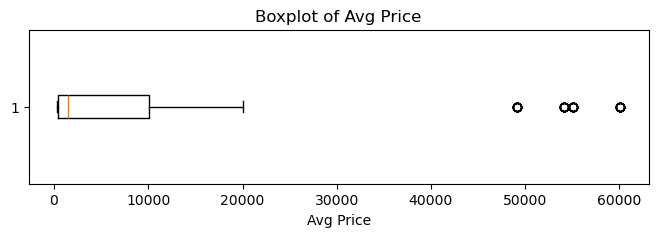

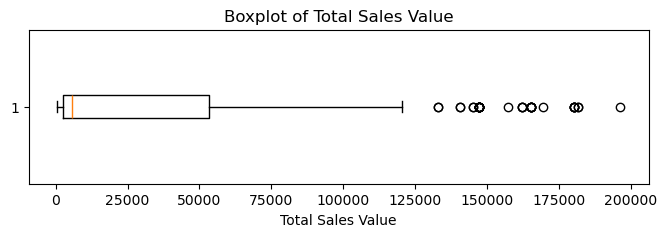

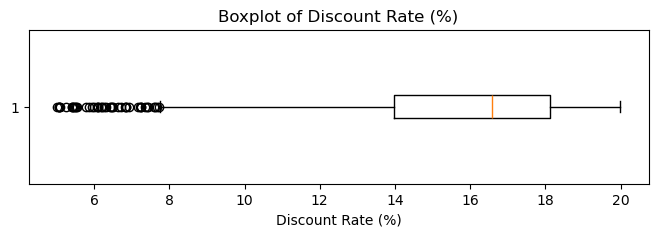

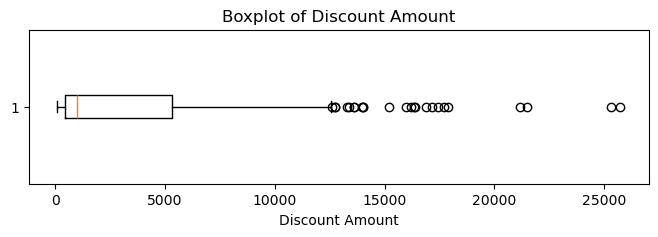

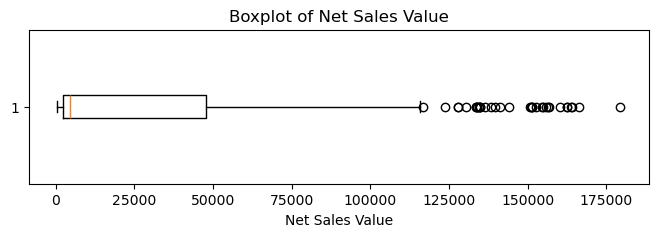

In [15]:
#  Create boxplots for each numerical column
import matplotlib.pyplot as plt
for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
  

In [16]:
# Discuss any findings, such as extreme values or unusual distributions.
'''The boxplots show that most numerical columns, especially those related to sales and prices, have several high outliers, indicating some unusually large
transactions or values. Only the discount rate appears stable without extreme points. These outliers suggest variability in the data and may need further
review to avoid skewing future analysis.'''




'The boxplots show that most numerical columns, especially those related to sales and prices, have several high outliers, indicating some unusually large\ntransactions or values. Only the discount rate appears stable without extreme points. These outliers suggest variability in the data and may need further\nreview to avoid skewing future\xa0analysis.'

In [17]:
	# Identify categorical columns in the dataset.
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


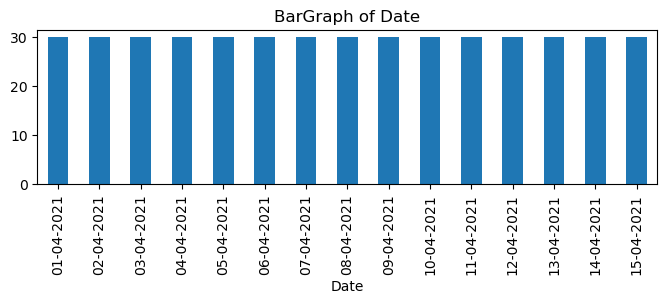

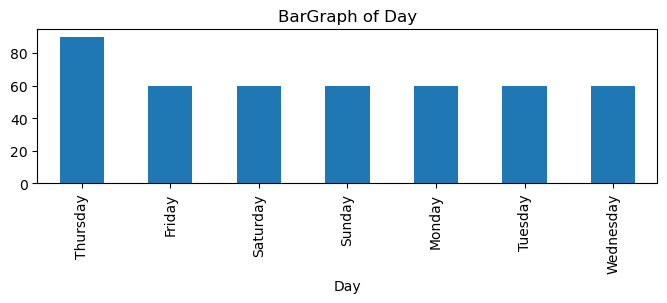

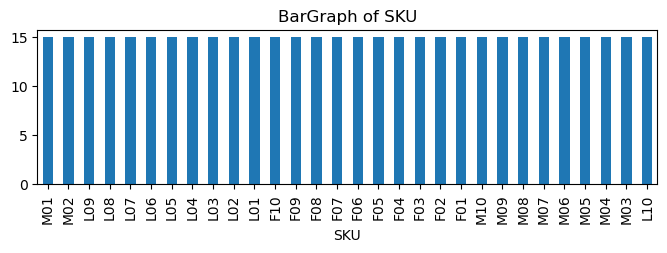

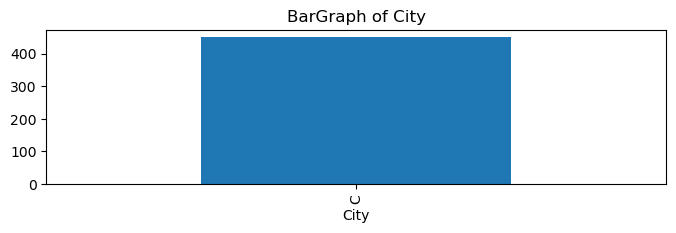

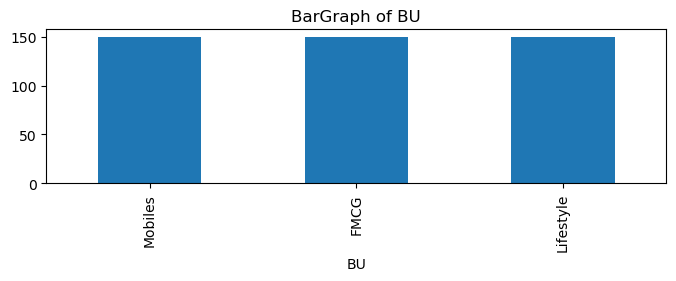

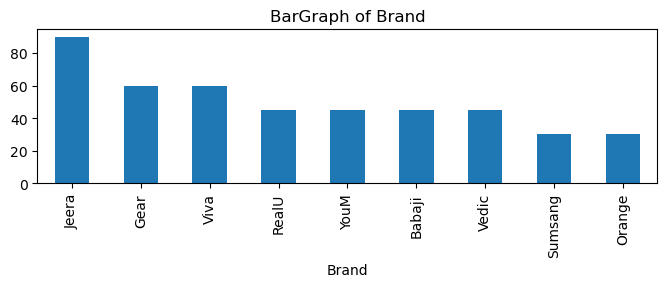

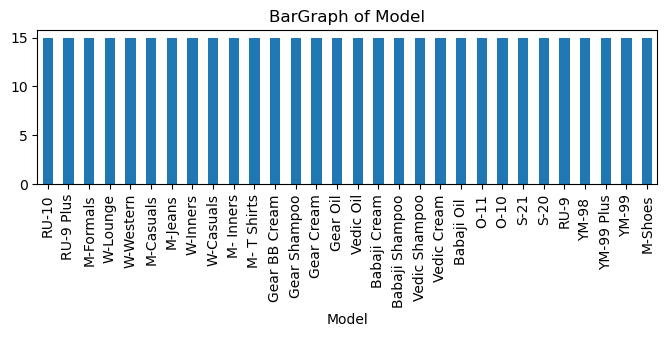

In [18]:
for col in categorical_cols:
    plt.figure(figsize=(8, 2))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'BarGraph of {col}')
    plt.xlabel(col)
    plt.show()

In [19]:
'''1. Date
*The data spans multiple distinct dates, each with a similar number of entries.This indicates a consistent daily record-keeping pattern — likely one 
row per SKU per day.
2. Day
*Days like Monday to Friday show a relatively even distribution.Slight dips on weekends suggest either lower activity or fewer recorded transactions 
on those days.
3. SKU
*There are many unique SKUs, most of which occur only a few times.Indicates a wide product variety but potentially low volume per SKU.
4. City
*A few cities dominate the dataset, while others appear infrequently.Implies concentration of sales in major cities — possibly key markets or regions 
with stronger performance.
5. BU (Business Unit)
*Only a few BUs are present, with uneven distribution.Some BUs may be more active or central to the business strategy.
6. Brand
*A small number of brands dominate, with others trailing.Suggests brand concentration, where a few brands drive the majority of sales.
7. Model
*Similar to SKU: high variety, low frequency per model.Suggests a broad portfolio but may need rationalization or focus on high-performing models.'''



'1. Date\n*The data spans multiple distinct dates, each with a similar number of entries.This indicates a consistent daily record-keeping pattern — likely one \nrow per SKU per day.\n2. Day\n*Days like Monday to Friday show a relatively even distribution.Slight dips on weekends suggest either lower activity or fewer recorded transactions \non those days.\n3. SKU\n*There are many unique SKUs, most of which occur only a few times.Indicates a wide product variety but potentially low volume per SKU.\n4. City\n*A few cities dominate the dataset, while others appear infrequently.Implies concentration of sales in major cities — possibly key markets or regions \nwith stronger performance.\n5. BU (Business Unit)\n*Only a few BUs are present, with uneven distribution.Some BUs may be more active or central to the business strategy.\n6. Brand\n*A small number of brands dominate, with others trailing.Suggests brand concentration, where a few brands drive the majority of sales.\n7. Model\n*Similar t

In [20]:
# the concept of standardization (z-score normalization).
'''

Standardization will removes the units from the given X variable so that our variables becomes free of units.Once the standardization is done, our data
will be adjusted in between -3 to +3 sigma. Standardization is one of the technique in Data Tranformation Technique which gets continuous data.
                    We not only use Standardization for removing units but also we can also use it in Machine Learning.
    
formula   Z = (x - mu)/sigma
in this formula X stands for original value, mu stands for mean and sigma stands for Standard Deviation.
    
we will adjust the data in between 0 to 1 ,The output value which we get will always lies in between 0 to 1, even if we take any parameters or variables the center or mean will always 
represents center or 0 in -3 sigma to +3 sigma.
so we are not allowing the data to lies <0 and >1 , we are making it to lie in between 0 to 1.

99.7% of data lies in between -3 sigma to +3 sigma approximately and 95.5% of data lies in between -2 sigma to +2 sigma approximately
and 68% of data lies in between -1 sigma to +1 sigma approximately.

if we take -3 sigma to +3 sigma as one block so 0.5 % of data lies in between -3 to 0 and remaining 0.5 % data lies in between 0 to +3.

'''

'\n\nStandardization will removes the units from the given X variable so that our variables becomes free of units.Once the standardization is done, our data\nwill be adjusted in between -3 to +3 sigma. Standardization is one of the technique in Data Tranformation Technique which gets continuous data.\n                    We not only use Standardization for removing units but also we can also use it in Machine Learning.\n    \nformula   Z = (x - mu)/sigma\nin this formula X stands for original value, mu stands for mean and sigma stands for Standard Deviation.\n    \nwe will adjust the data in between 0 to 1 ,The output value which we get will always lies in between 0 to 1, even if we take any parameters or variables the center or mean will always \nrepresents center or 0 in -3 sigma to +3 sigma.\nso we are not allowing the data to lies <0 and >1 , we are making it to lie in between 0 to 1.\n\n99.7% of data lies in between -3 sigma to +3 sigma approximately and 95.5% of data lies in betw

In [21]:
#	Standardize the numerical columns using the formula: z=x-mu/sigma

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
print(df[num_cols].head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


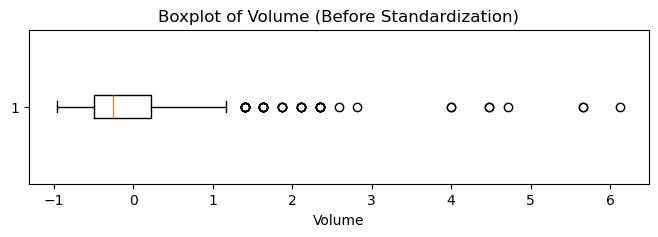

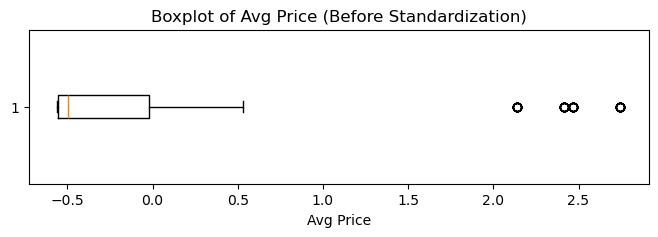

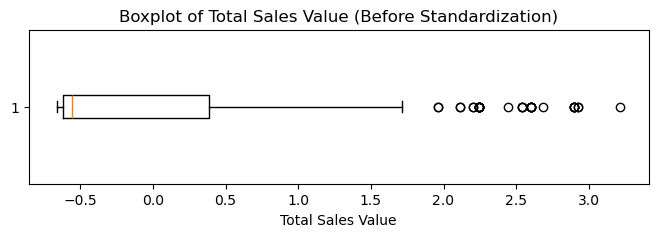

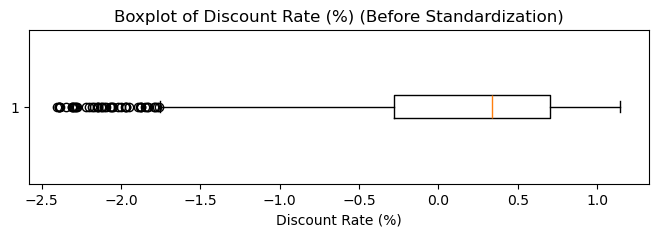

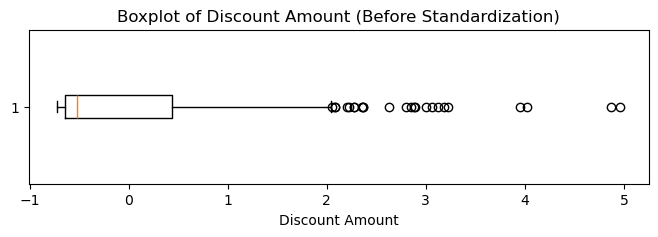

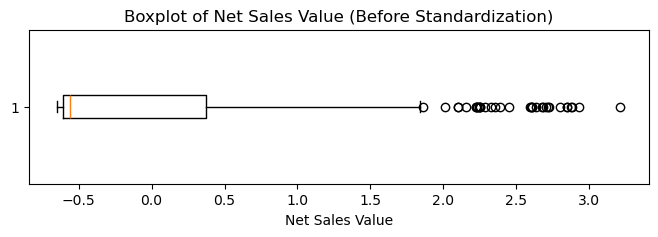

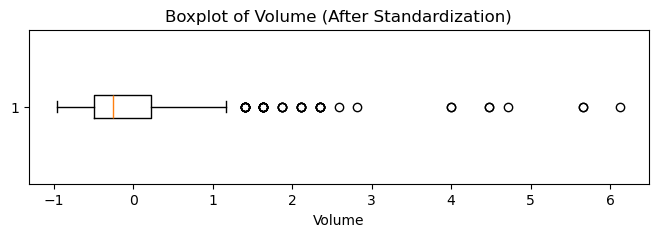

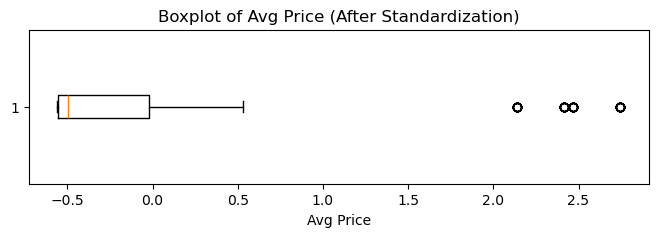

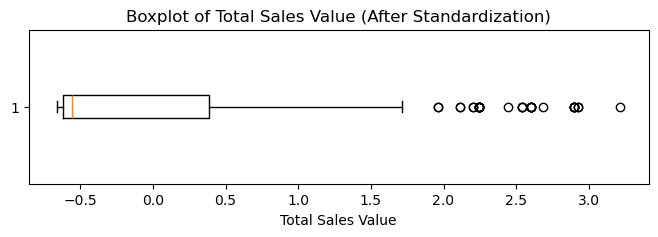

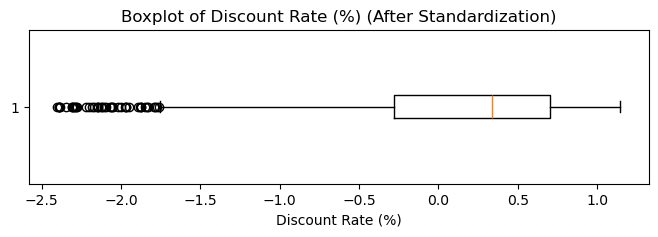

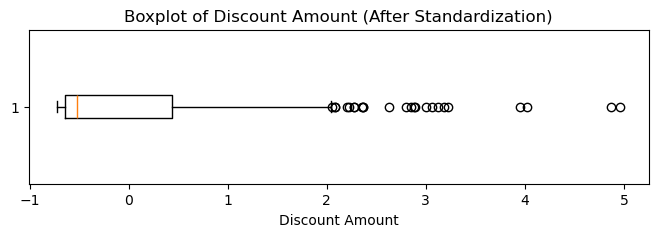

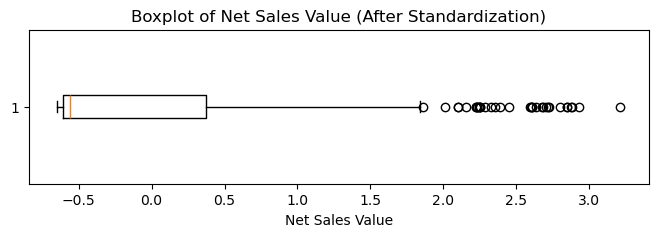

In [22]:
# Before Standardization - Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col} (Before Standardization)')
    plt.xlabel(col)
    

# After Standardization - Boxplots
for col in num_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col} (After Standardization)')
    plt.xlabel(col)
    plt.show()
    plt.show()

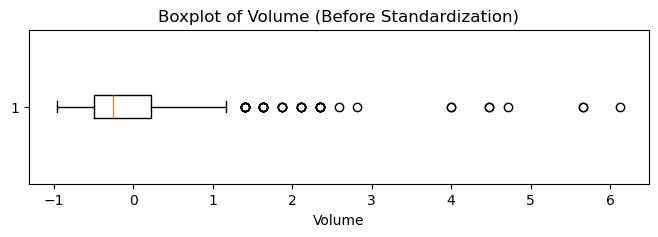

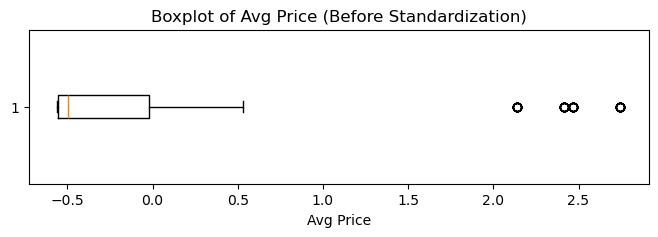

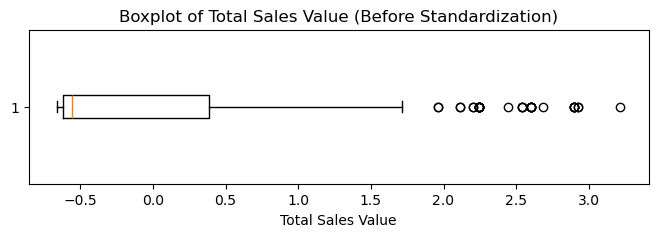

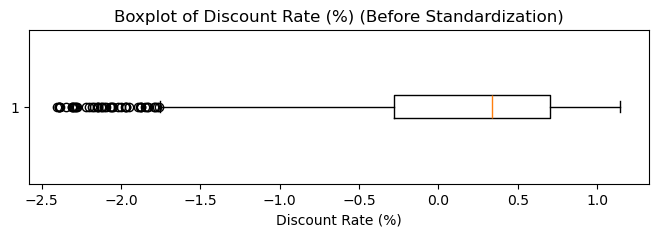

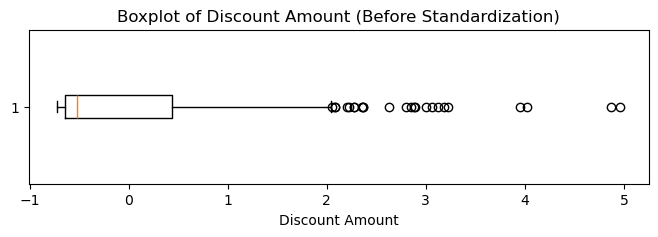

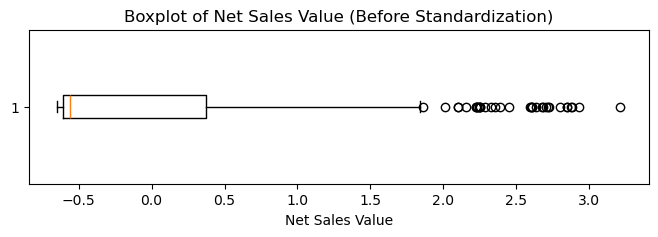

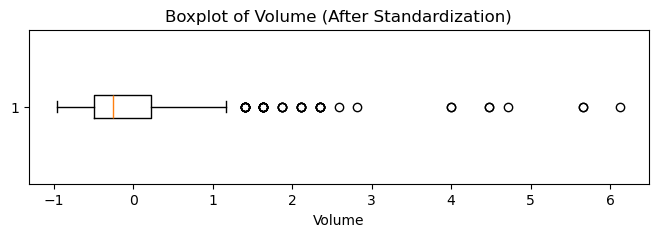

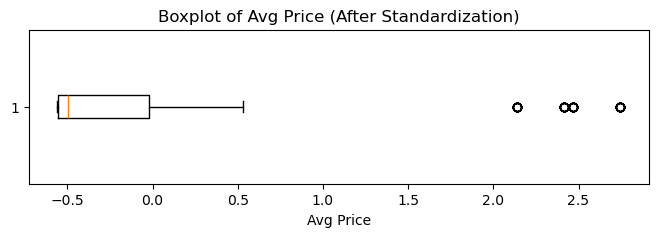

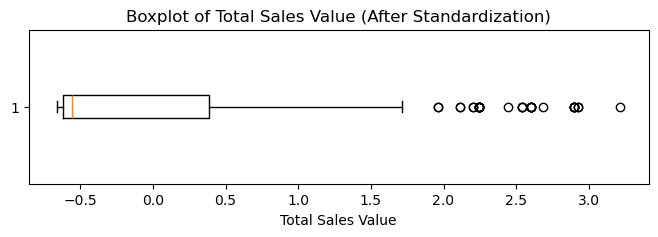

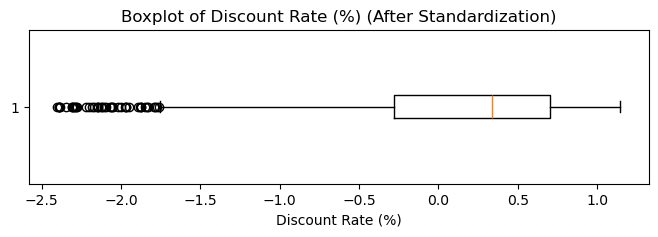

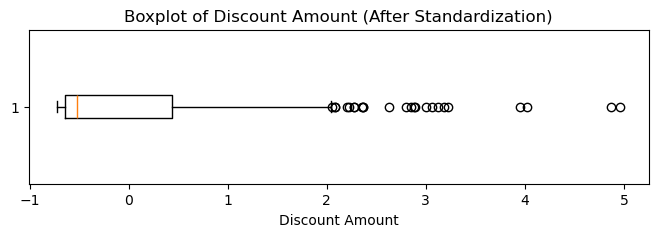

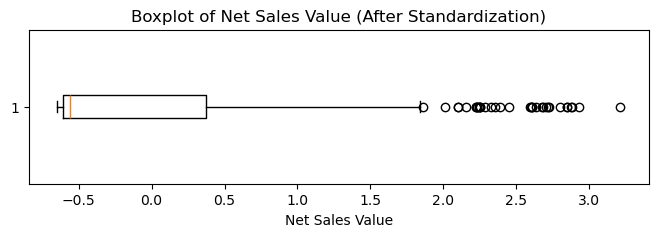

In [23]:
import matplotlib.pyplot as plt
# Standardize numerical columns
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()

# Before Standardization - Boxplots
for col in num_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col} (Before Standardization)')
    plt.xlabel(col)
    plt.show()

# After Standardization - Boxplots
for col in num_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col} (After Standardization)')
    plt.xlabel(col)
    plt.show()

In [24]:
# Conversion of Categorical Data into Dummy Variables
'''--> First while doing One Hot Encoding we have to import it, OneHotEncoder is present in sklearn.preprocessing.
    so we need to import it like from sklearn.preprocessing import OneHotEncoder

Most machine learning methods use numbers as inputs. Therefore, categorical variables like “Gender, Ever Married, Residence Type” are considered 
non-numeric. In order to make the data usable for modeling it, one-hot encoding turns each category into separate binary (0 or 1) variable.

example:

column : Gender    Ever Married   Residence Type    
                       
Gender : F - 0 ,  M - 1
   here if the person is Male or Female according to Alphabetical order it will give 0 Or 1

Ever Married :  
  here it will print if the person is married or unmarried in binary language 
  like if person got married it will print 1 and if person is unmarried it will print 0 

Residence Type :
 here it will print if a person is Rural or Urban in binary language
 like if person lives in Rural area it will print 1 and if person lives in Urban area it will print 0 



Why It’s Important

(models) cannot process text. Algorithms such as linear regression or a neural network require numbers.

Avoids false ordering: Assigning numbers suggests a ranking that does not exist.

Improves accuracy: Helps the models learn the correct patterns and treat the independent categories.'''
                                                                                                    


'--> First while doing One Hot Encoding we have to import it, OneHotEncoder is present in sklearn.preprocessing.\n    so we need to import it like from sklearn.preprocessing import\xa0OneHotEncoder\n\nMost machine learning methods use numbers as inputs. Therefore, categorical variables like “Gender, Ever Married, Residence Type” are considered \nnon-numeric. In order to make the data usable for modeling it, one-hot encoding turns each category into separate binary (0 or 1) variable.\n\nexample:\n\ncolumn : Gender    Ever Married   Residence Type    \n                       \nGender : F - 0 ,  M - 1\n   here if the person is Male or Female according to Alphabetical order it will give 0 Or 1\n\nEver Married :  \n  here it will print if the person is married or unmarried in binary language \n  like if person got married it will print 1 and if person is unmarried it will print 0 \n\nResidence Type :\n here it will print if a person is Rural or Urban in binary language\n like if person live

In [25]:
# # Apply one-hot encoding
# df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# df_encoded
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Display the resulting DataFrame
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#conclusion
We were able to identify important patterns in the Sales & Discounts dataset thanks to the descriptive analytics. Variations in sales and profit were
displayed in numerical columns, along with skewed distributions and a few outliers. Future modeling should take note of the uneven frequencies found in
categorical data, such as region and category.

In order to prepare the dataset, data preprocessing was essential. For algorithms that depend on distance or gradients, standardization brought
numerical values to a common scale. Categorical columns were transformed into numeric format via one-hot encoding so that machine learning models 
could use them. To guarantee clean, consistent, and model-ready data, these procedures are crucial.